![iut](https://github.com/Hexanol777/STEM-Salaries-Case-Study/tree/main/Phase%201/stock_image/IUT200.png)
<hr style="margin-bottom: 40px;">

<img src="https://github.com/Hexanol777/STEM-Salaries-Case-Study/tree/main/Phase%201/stock_image/Header.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# STEM Jobs Salaries

## Data Visualization

#### Data visualization is an essential component of any data analysis project as it allows us to explore and communicate our data effectively. By creating visual representations of the data, we can identify patterns, trends, and outliers that may not be immediately apparent from raw data.These visualizations will help us to gain insights into the distribution of the data, the relationship between different variables, and any outliers that may exist. Ultimately, the goal of data visualization is to provide a clear and concise representation of the data that is easy to understand and interpret, even for those without a strong background in data analysis.

[Link to the Data used in this Notebook](https://drive.google.com/file/d/1IhXv0qcq7YFfBxc0BQB1-z74wF40ZnZn/view?usp=share_link)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Importing Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Loading The Data:

In [47]:
!head data/jobs_with_country_codes.csv
# Note: incase if you are running this line locally you will be met with the error below
# as this notebook is meant to be executed at Google Colab

'head' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
Data = pd.read_csv(
    'data/jobs_with_country_codes.csv',
    parse_dates=['Timestamp'])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## The Data at a Glance:

In [3]:
Data.head()

,Timestamp,Company,Level,Title,TotalYearlyCompensation,Country,IsUS,IsCA,IsID,IsIN,...,Tag,BaseSalary,StockGrantValue,Bonus,Gender,IsMale,IsFemale,Masters_Degree,Bachelors_Degree,Education
0,2021-04-04 06:10:00,IBM,Band 10,Technical Program Manager,176000,AE,0,0,0,0,...,Customer Success,180000,0.0,0.0,Male,1,0,0,1,Bachelor's Degree
1,2020-05-27 04:31:00,Google,6,Solution Architect,350000,AE,0,0,0,0,...,API Development (Back-End),190000,100000.0,60000.0,NaN,0,0,0,0,NaN
2,2020-09-03 23:29:00,EY,Senior Manao,Management Consultant,245000,AE,0,0,0,0,...,Operations,195000,40000.0,10000.0,Male,1,0,1,0,Master's Degree
3,2021-07-21 04:23:00,IBM,Band 9,Marketing,698000,AE,0,0,0,0,...,Marketing,696000,0.0,2000.0,NaN,0,0,0,0,NaN
4,2020-11-03 16:48:00,Careem,L7,Product Manager,290000,AE,0,0,0,0,...,Product,190000,100000.0,0.0,Male,1,0,1,0,Master's Degree


In [6]:
Data.shape

(50132, 16)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50132 entries, 0 to 50131
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Timestamp                50132 non-null  datetime64[ns]
 1   Company                  50130 non-null  object        
 2   Level                    50022 non-null  object        
 3   Title                    50132 non-null  object        
 4   TotalYearlyCompensation  50132 non-null  int64         
 5   Country                  50132 non-null  object        
 6   YearsOfExperience        50132 non-null  float64       
 7   YearsAtCompany           50132 non-null  float64       
 8   Tag                      49740 non-null  object        
 9   BaseSalary               50132 non-null  int64         
 10  StockGrantValue          50132 non-null  float64       
 11  Bonus                    50132 non-null  float64       
 12  Gender                   34675 n

In [4]:
Data.describe()

,TotalYearlyCompensation,IsUS,IsCA,IsID,IsIN,IsDE,YearsOfExperience,YearsAtCompany,BaseSalary,StockGrantValue,Bonus,IsMale,IsFemale,Masters_Degree,Bachelors_Degree
count,5.013000e+04,50130.000000,50130.000000,50130.000000,50130.000000,50130.000000,50130.000000,50130.000000,50130.000000,5.013000e+04,50130.000000,50130.000000,50130.000000,50130.000000,50130.000000
mean,2.107311e+05,0.835368,0.050389,0.023020,0.019150,0.010712,7.193807,2.668444,139968.919908,5.110504e+04,19458.773703,0.566786,0.119190,0.306922,0.251446
std,1.337268e+05,0.370852,0.218748,0.149969,0.137054,0.102945,5.811294,3.242424,56827.190394,8.199810e+04,26418.336951,0.495524,0.324015,0.461221,0.433849
min,1.000000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.290000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,109000.000000,0.000000e+00,2000.000000,0.000000,0.000000,0.000000,0.000000
50%,1.830000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,140000.000000,2.400000e+04,14000.000000,1.000000,0.000000,0.000000,0.000000
75%,2.590000e+05,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,4.000000,170000.000000,6.400000e+04,26000.000000,1.000000,0.000000,1.000000,1.000000
max,2.500000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,40.000000,40.000000,900000.000000,2.800000e+06,900000.000000,1.000000,1.000000,1.000000,1.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Numerical analysis and visualization

We'll analyze the `BaseSalary` column:

In [21]:
Data['TotalYearlyCompensation'].describe()

count     50132
mean     210728
std      133725
min       10000
25%      129000
50%      183000
75%      259000
max     2500000
Name: TotalYearlyCompensation, dtype: float64

In [17]:
Data['TotalYearlyCompensation'].mean()

210727.8466049629

In [18]:
Data['TotalYearlyCompensation'].median()

183000.0

In [19]:
# Specify the tick format as full numbers instead of scientific numbers
pd.set_option('display.float_format', '{:.0f}'.format)

<Axes: >

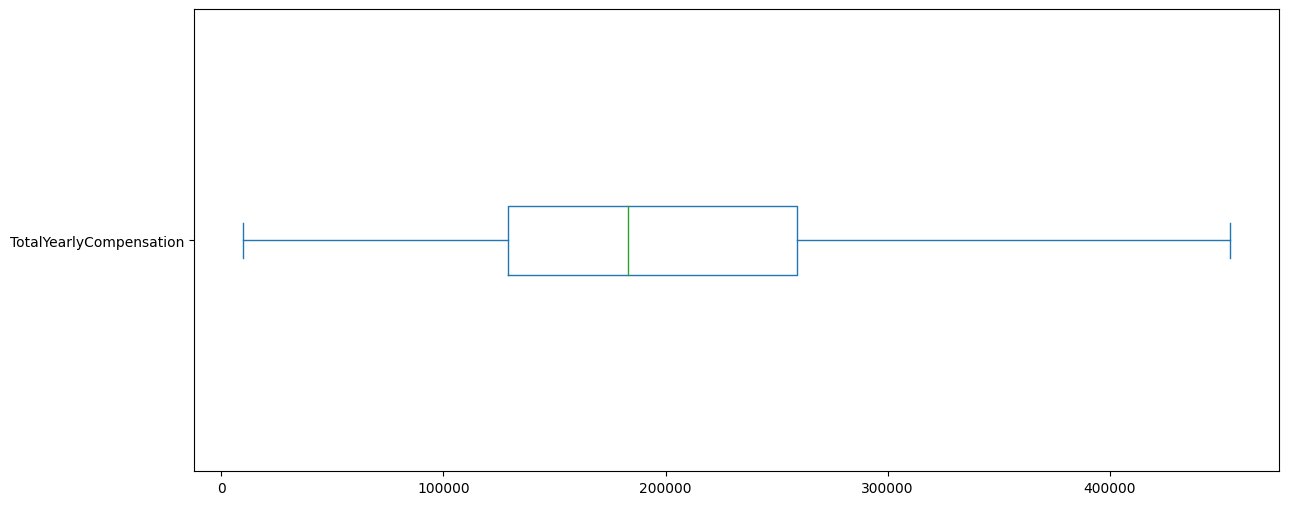

In [20]:
Data['TotalYearlyCompensation'].plot(kind='box', vert=False, showfliers=False, figsize=(14,6))

<Axes: ylabel='Density'>

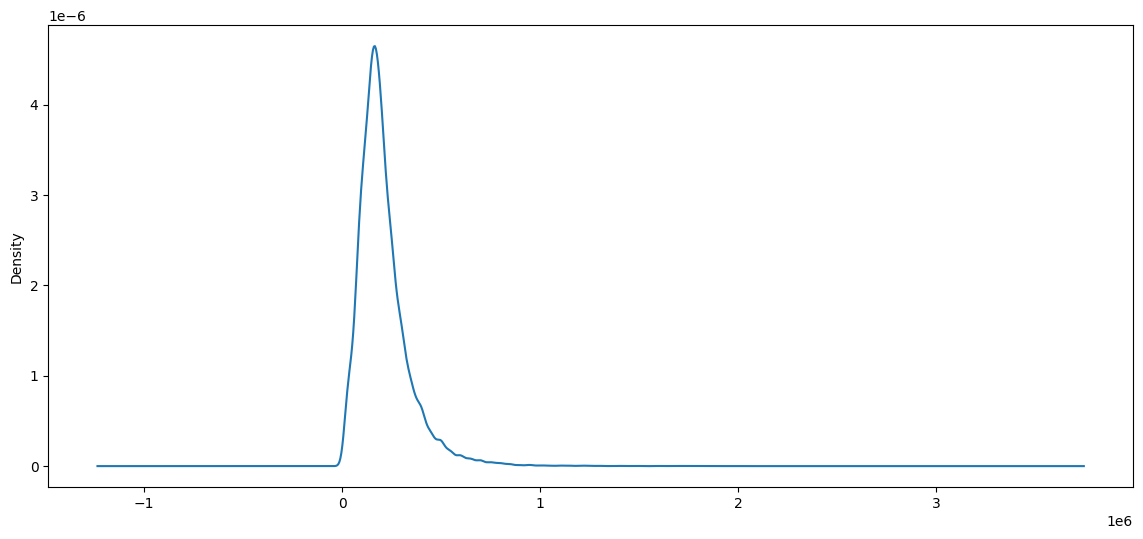

In [22]:
Data['TotalYearlyCompensation'].plot(kind='density', figsize=(14,6))

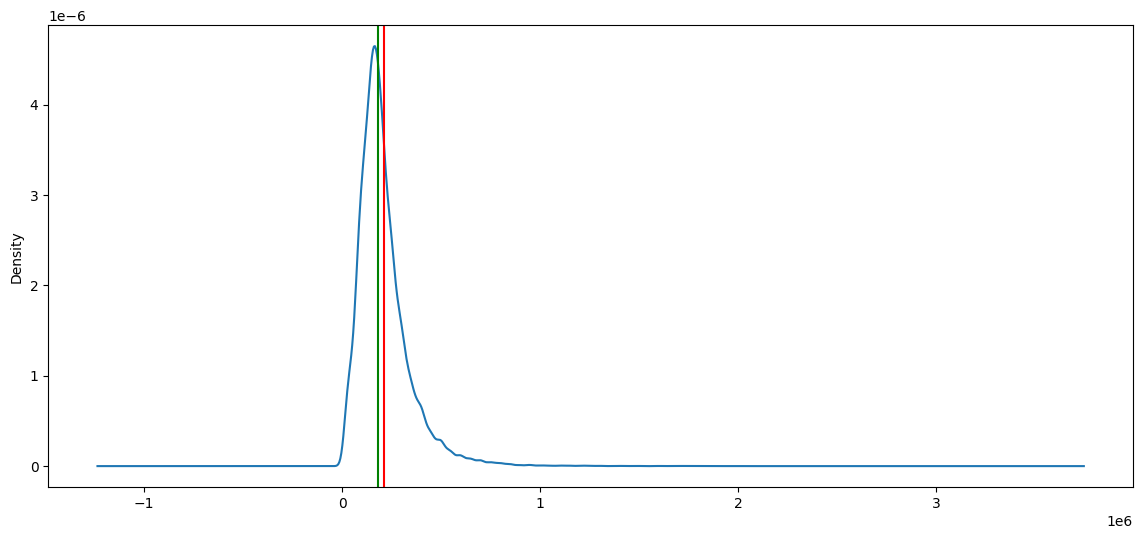

In [14]:
ax = Data['TotalYearlyCompensation'].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(Data['TotalYearlyCompensation'].mean(), color='red')
ax.axvline(Data['TotalYearlyCompensation'].median(), color='green')

Text(0.5, 0, 'Dollars')

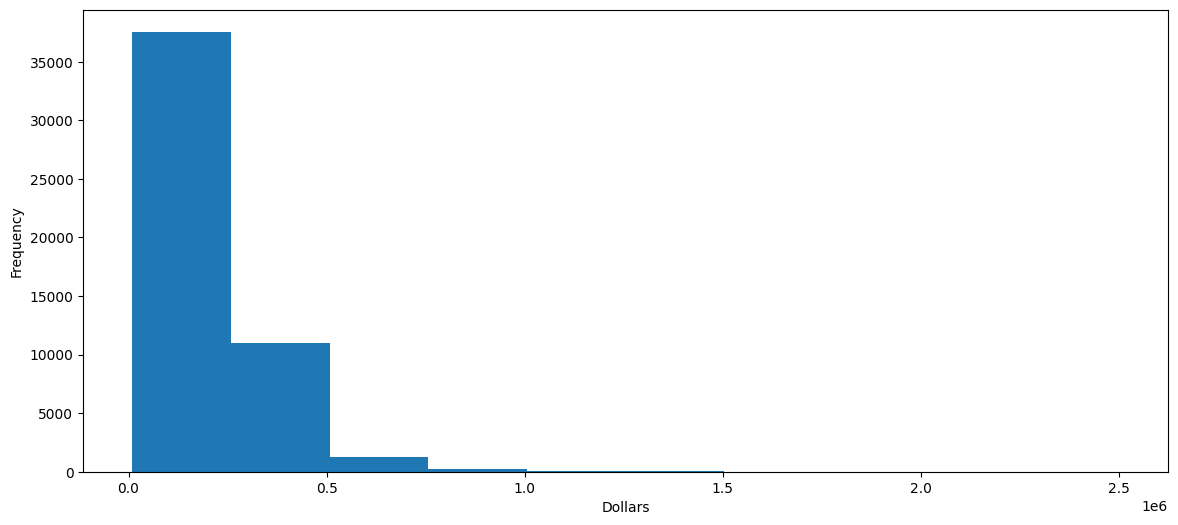

In [15]:
ax = Data['TotalYearlyCompensation'].plot(kind='hist', figsize=(14,6))
ax.set_ylabel('Frequency')
ax.set_xlabel('Dollars')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Categorical analysis and visualization

We'll analyze the `Country` column:

Later on the `.nlargest()` method to force the graphs to only show first 8 countries.
[Refer to the ``Pandas Documentation`` for more info](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html#pandas-dataframe-nlargest) 

The `autopct='%1.1f%%'` is also used to display percentages up to the 0.x decimal on the pie charts.
[Link to documentaion for further info](https://matplotlib.org/3.1.1/_modules/matplotlib/pyplot.html#pie)

### What 'Countries' host the most STEM job positions?

In [5]:
Data['Country'].value_counts()

US    41877
CA     2526
ID     1154
IN      960
DE      537
      ...  
MD        1
AT        1
UZ        1
VN        1
AM        1
Name: Country, Length: 71, dtype: int64

<Axes: ylabel='Country'>

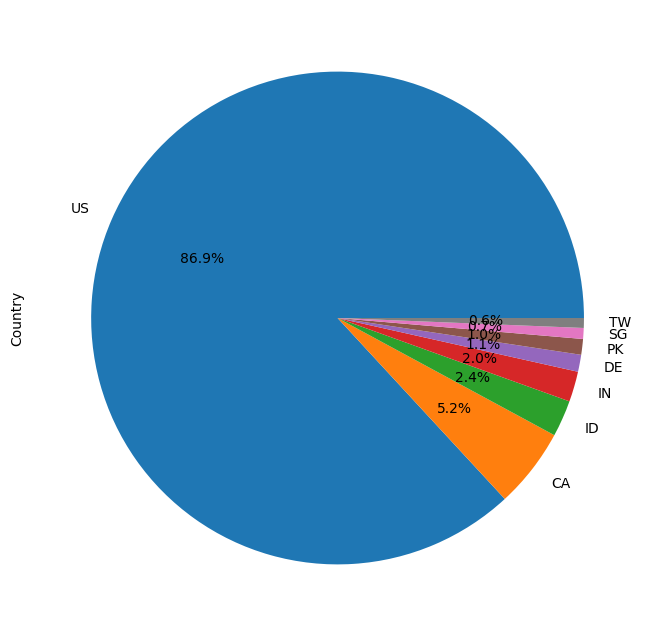

In [6]:
Data['Country'].value_counts().nlargest(8).plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')

Text(0, 0.5, 'Number of STEM Positions')

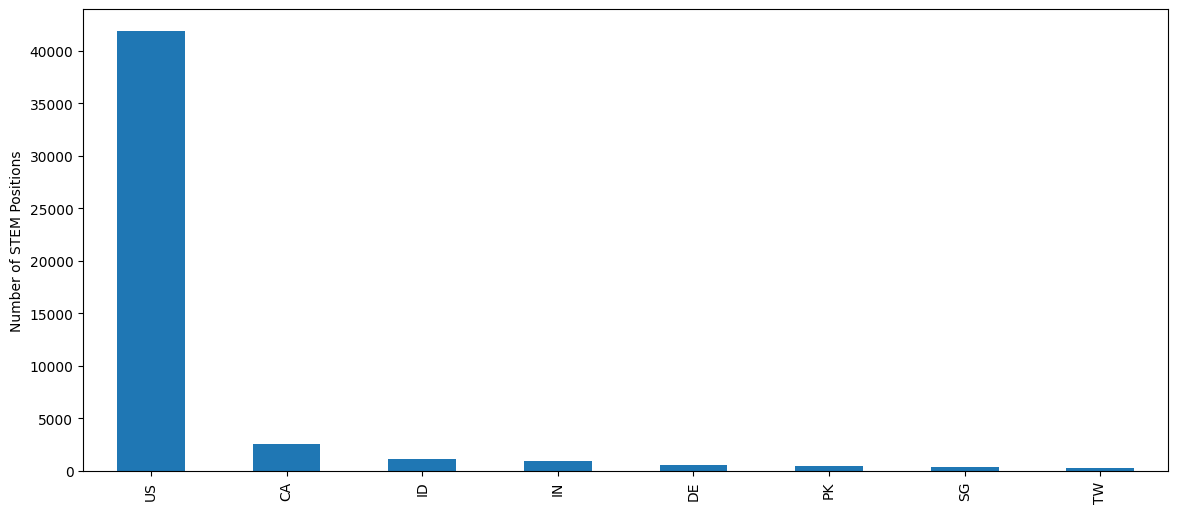

In [66]:
plot = Data['Country'].value_counts().nlargest(8).plot(kind='bar', figsize=(14,6))
plot.set_ylabel('Number of STEM Positions')

### Gender distribution among STEM workers?

<Axes: ylabel='Gender'>

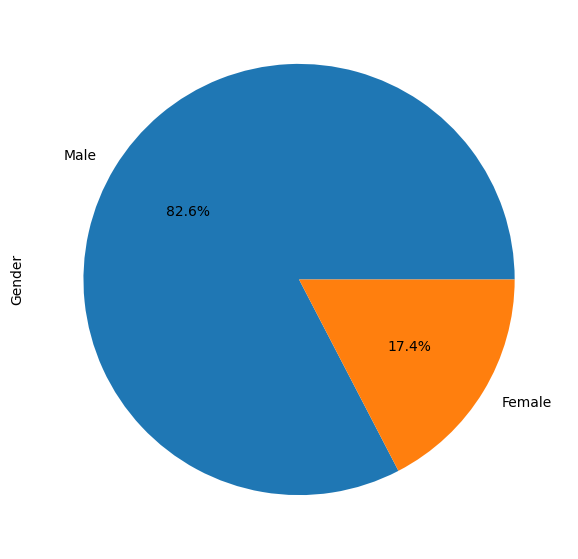

In [7]:
filtered_data = Data[Data['Gender'] != 'NA']
filtered_data['Gender'].value_counts().nlargest(2).plot(kind='pie', figsize=(7,7), autopct='%1.1f%%')

### Distribution of educational attainment among individuals employed in STEM fields

<Axes: ylabel='Education'>

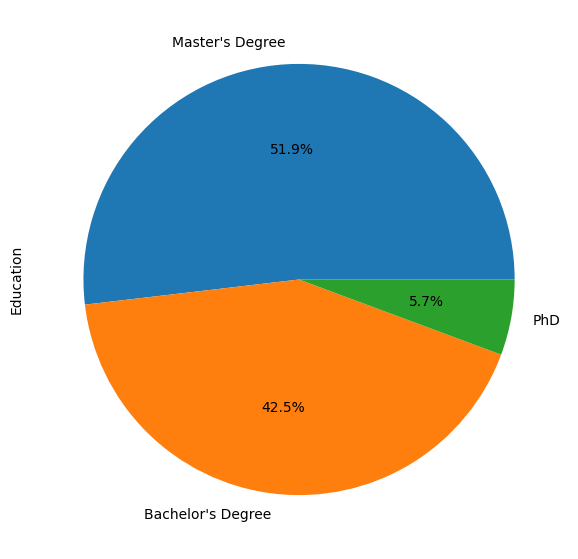

In [8]:
filtered_data = Data[Data['Education'] != 'NA']
filtered_data['Education'].value_counts().nlargest(3).plot(kind='pie', figsize=(7,7), autopct='%1.1f%%')

### Most common titles?

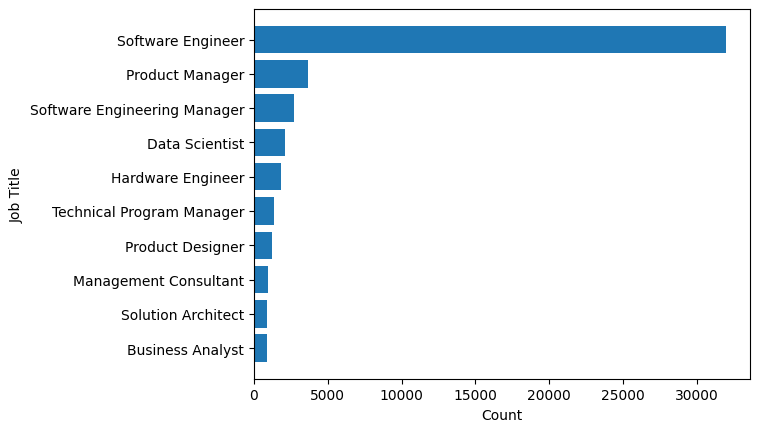

Software Engineer               31986
Product Manager                  3675
Software Engineering Manager     2690
Data Scientist                   2111
Hardware Engineer                1846
Technical Program Manager        1378
Product Designer                 1243
Management Consultant             976
Solution Architect                907
Business Analyst                  875
Name: Title, dtype: int64

In [11]:
Title_counts = Data['Title'].value_counts()
Title_counts.head(10)
top_titles = Title_counts[:10]
plt.barh(top_titles.index, top_titles.values)
plt.gca().invert_yaxis()

plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()
Title_counts.head(10)

### Most common Companies?

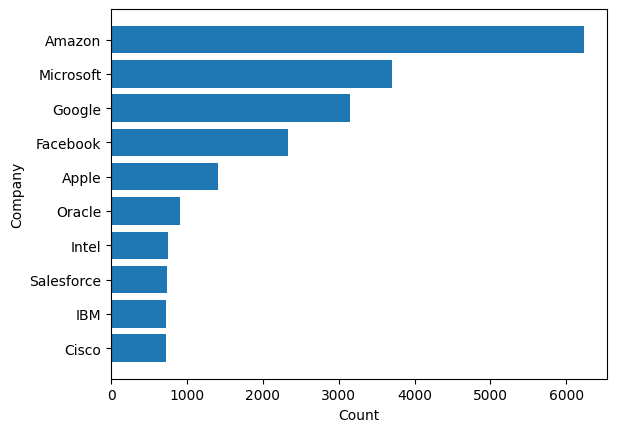

Amazon        6230
Microsoft     3703
Google        3153
Facebook      2333
Apple         1410
Oracle         905
Intel          744
Salesforce     739
IBM            721
Cisco          719
Name: Company, dtype: int64

In [13]:
Title_counts = Data['Company'].value_counts()
Title_counts.head(10)
top_titles = Title_counts[:10]
plt.barh(top_titles.index, top_titles.values)
plt.gca().invert_yaxis()

plt.xlabel('Count')
plt.ylabel('Company')
plt.show()
Title_counts.head(10)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

## Relationship between the columns?

Can we find any significant relationship?

In [105]:
corr = Data.corr(numeric_only=True)

corr

,TotalYearlyCompensation,YearsOfExperience,YearsAtCompany,BaseSalary,StockGrantValue,Bonus,Masters_Degree,Bachelors_Degree
TotalYearlyCompensation,1,0,0,1,1,1,0,-0
YearsOfExperience,0,1,1,0,0,0,0,-0
YearsAtCompany,0,1,1,0,0,0,0,-0
BaseSalary,1,0,0,1,0,0,0,-0
StockGrantValue,1,0,0,0,1,0,0,-0
Bonus,1,0,0,0,0,1,0,-0
Masters_Degree,0,0,0,0,0,0,1,-0
Bachelors_Degree,-0,-0,-0,-0,-0,-0,-0,1


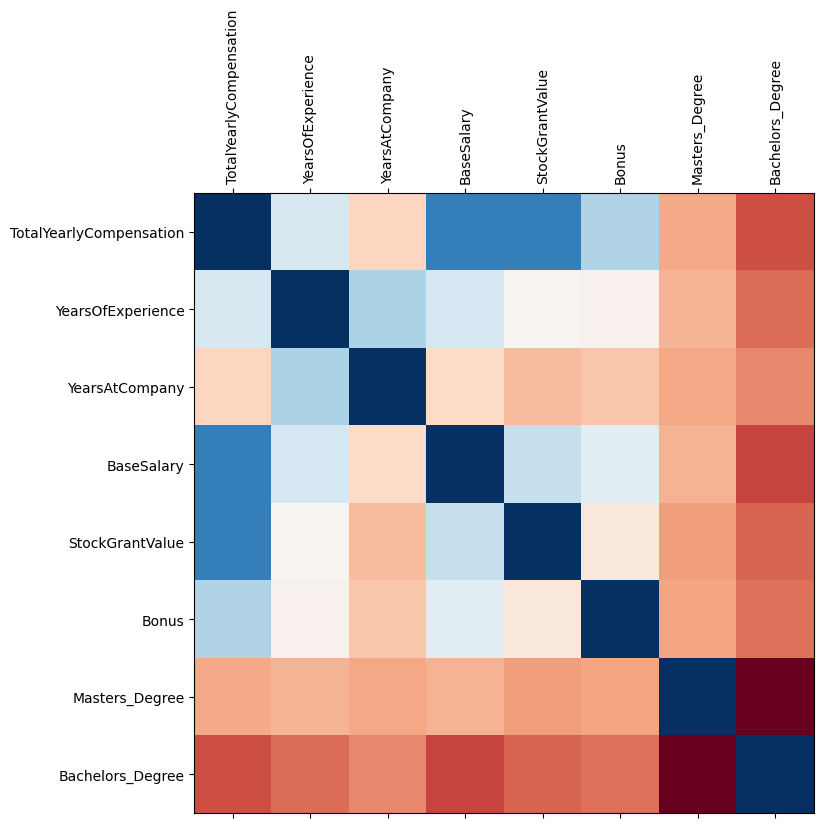

In [107]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<Axes: xlabel='YearsOfExperience', ylabel='TotalYearlyCompensation'>

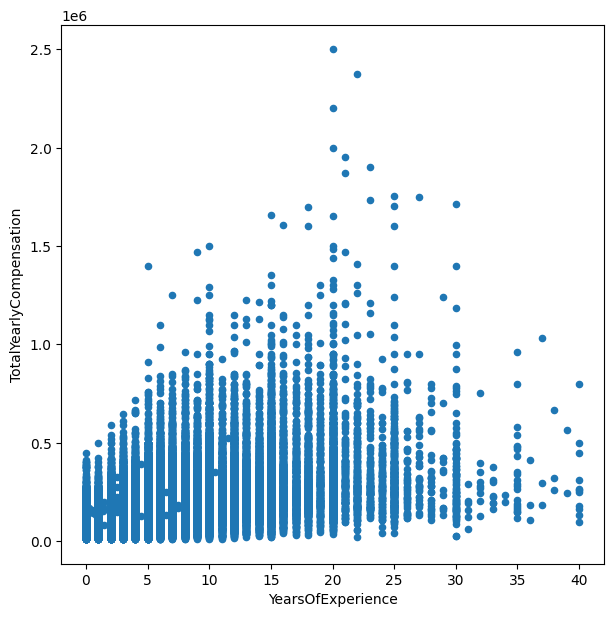

In [30]:
Data.plot(kind='scatter', x='YearsOfExperience', y='TotalYearlyCompensation', figsize=(7,7))

<Axes: xlabel='BaseSalary', ylabel='TotalYearlyCompensation'>

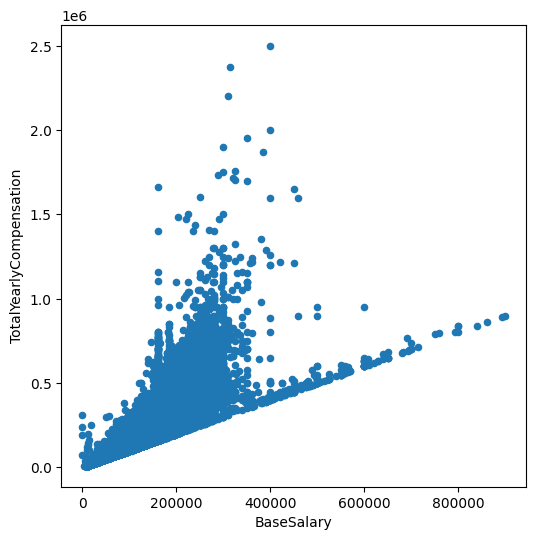

In [29]:
Data.plot(kind='scatter', x='BaseSalary', y='TotalYearlyCompensation', figsize=(6,6))

Text(0, 0.5, 'TotalYearlyCompensation')

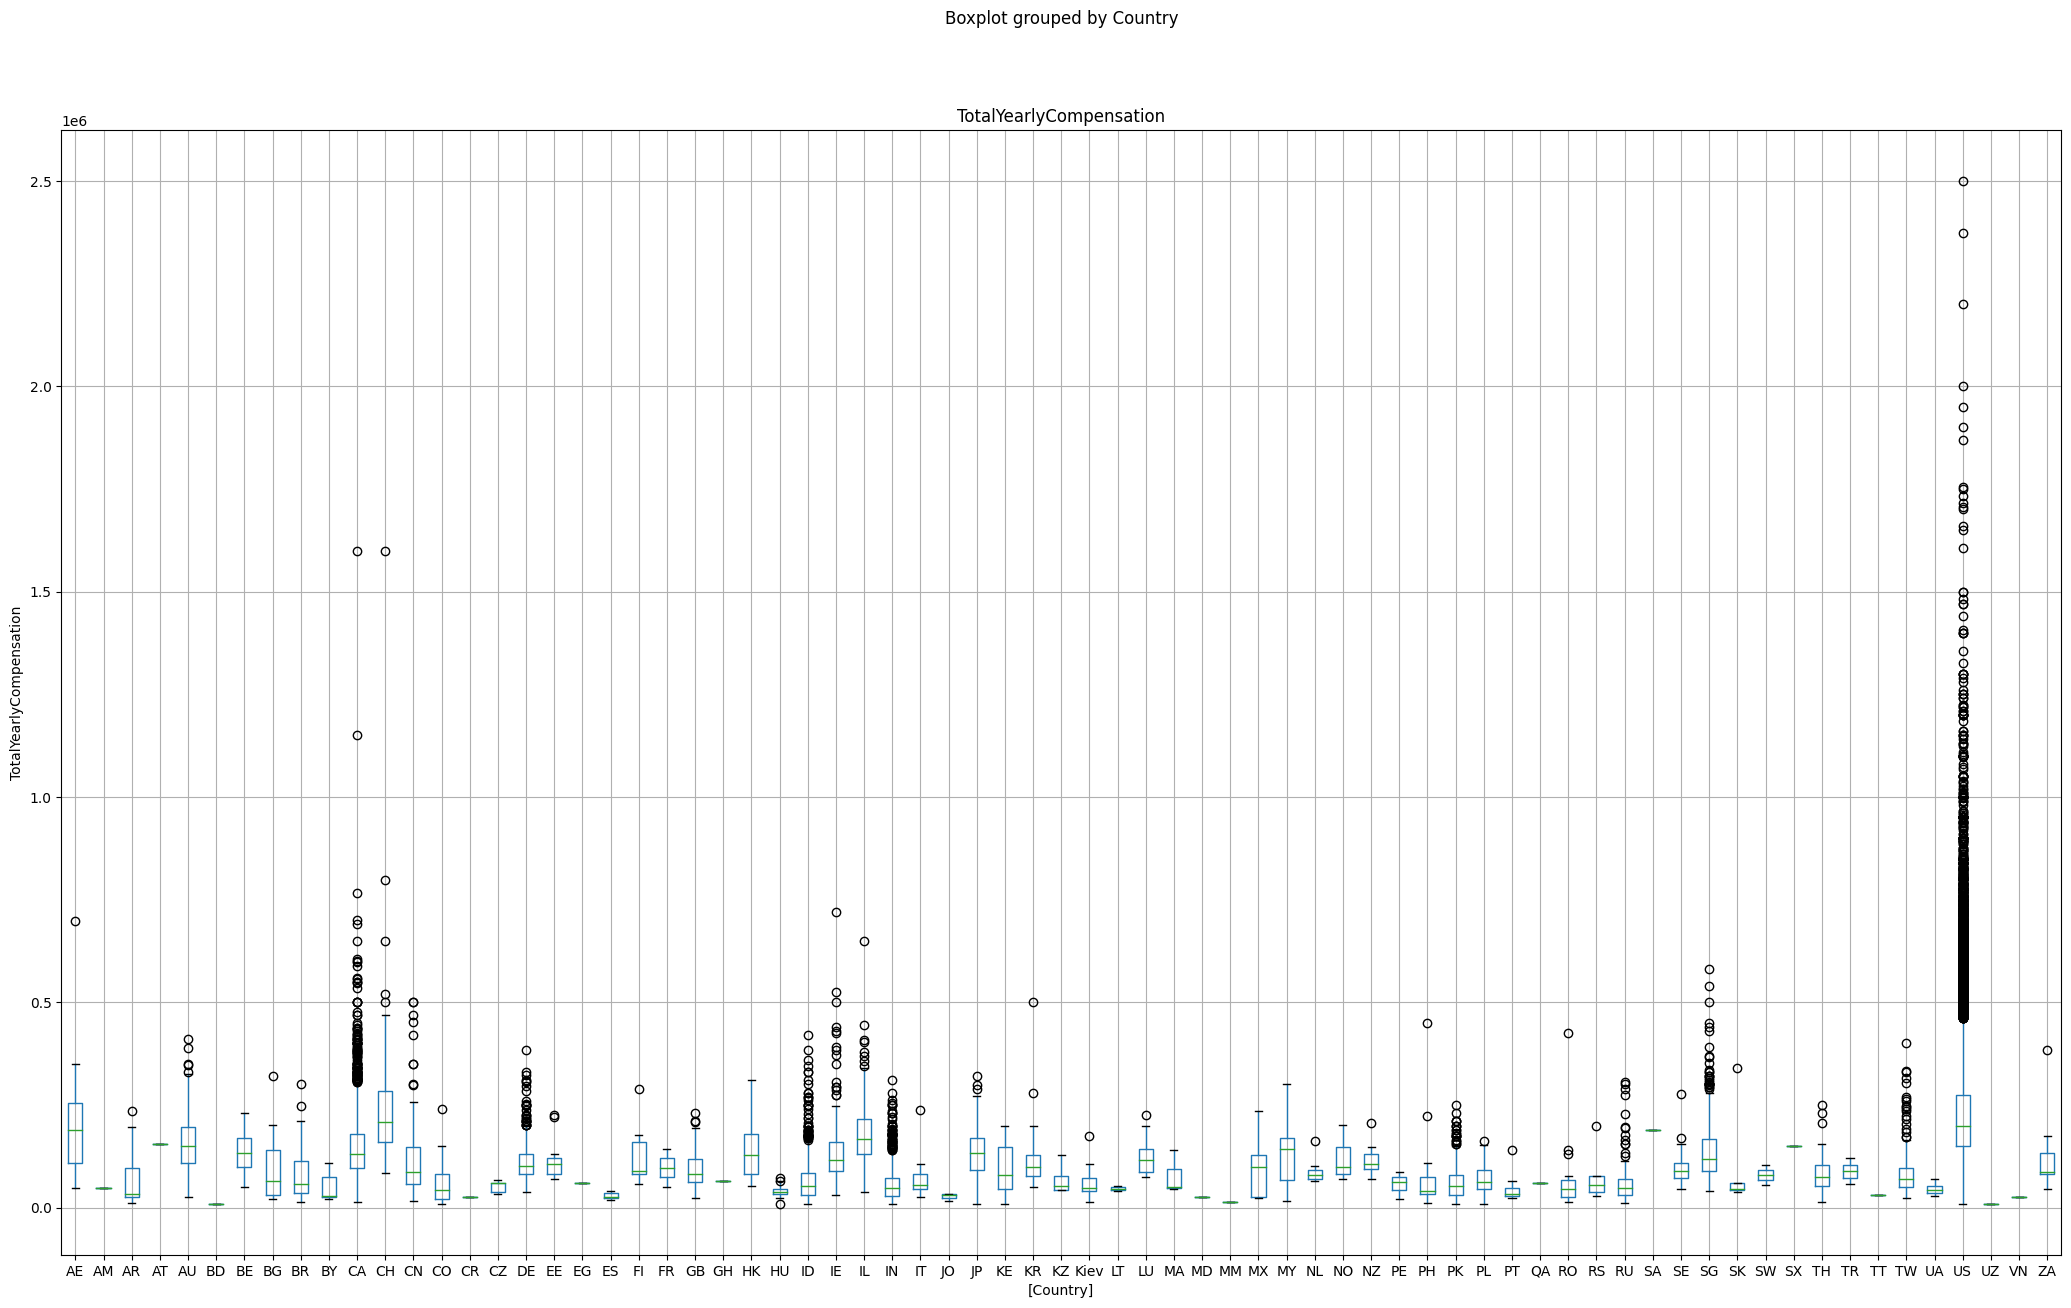

In [23]:
bxplt = Data[['TotalYearlyCompensation', 'Country']].boxplot(by='Country', figsize=(25,15))
bxplt.set_ylabel('TotalYearlyCompensation')

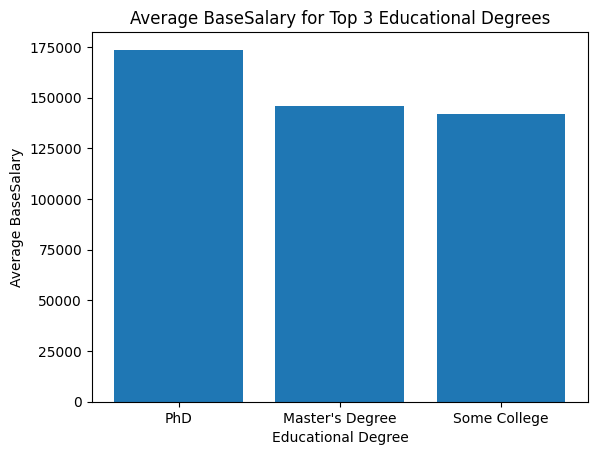

Education
PhD                173611.540750
Master's Degree    145711.295983
Some College       141966.197183
Name: BaseSalary, dtype: float64

In [11]:
degree_means = Data.groupby('Education')['BaseSalary'].mean()
top_3_degrees = degree_means.nlargest(3)
fig, ax = plt.subplots()
ax.bar(top_3_degrees.index, top_3_degrees.values)
ax.set_xlabel('Educational Degree')
ax.set_ylabel('Average BaseSalary')
ax.set_title('Average BaseSalary for Top 3 Educational Degrees')
plt.show()
top_3_degrees.head()

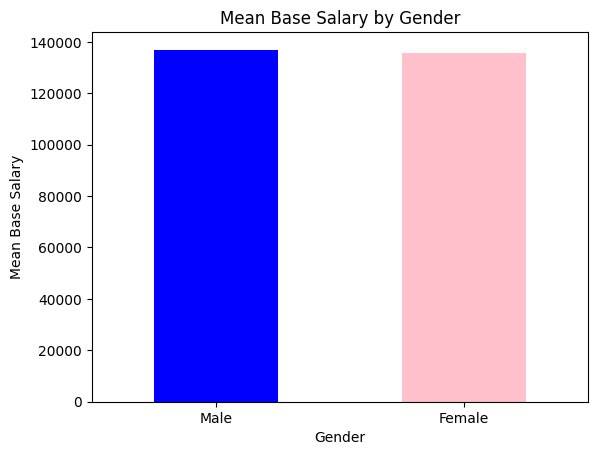

Gender
Male      136938.938796
Female    135712.401674
Name: BaseSalary, dtype: float64

In [16]:
excluded_data = Data[Data['Gender'] != 'Other']
gender_salary = excluded_data.groupby('Gender')['BaseSalary'].mean().nlargest(2)
gender_salary.plot(kind='bar', color=['blue', 'pink'])
plt.title('Mean Base Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Mean Base Salary')
plt.xticks(rotation=0)
plt.show()
gender_salary.head()

TotalYearlyCompensation       Axes(0.125,0.53;0.227941x0.35)
YearsOfExperience          Axes(0.398529,0.53;0.227941x0.35)
YearsAtCompany             Axes(0.672059,0.53;0.227941x0.35)
BaseSalary                    Axes(0.125,0.11;0.227941x0.35)
StockGrantValue            Axes(0.398529,0.11;0.227941x0.35)
Bonus                      Axes(0.672059,0.11;0.227941x0.35)
dtype: object

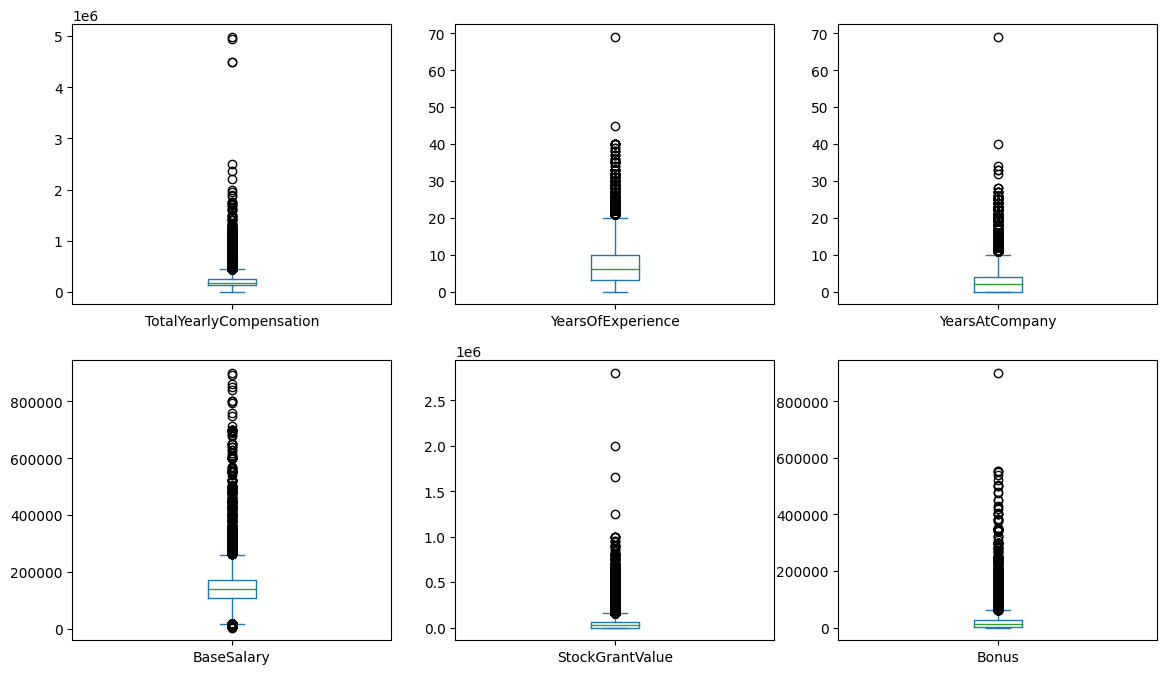

In [145]:
boxplot_cols = ['TotalYearlyCompensation', 'YearsOfExperience', 'YearsAtCompany', 'BaseSalary', 'StockGrantValue', 'Bonus']

Data[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
